## Описание проекта

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

**Цель:** подготовить исследование рынка по открытым данным о заведениях общественного питания в Москве.

### Описание данных

Таблица `rest_data`:
* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number` — количество посадочных мест.

## Оглавление:

1. [Шаг №1. Загрузка и подготовка данных к анализу](#step1)  
2. [Шаг №2. Анализ данных](#step2)
3. [Шаг №3. Общий вывод](#step3)

# Шаг №1. Загрузка и подготовка данных к анализу <a id="step1"></a>

In [1]:
import pandas as pd    #  импорт библиотек
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/datasets/rest_data.csv')
display(data.head())
data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


***Вывод:*** 

Тип данных в каждой колонке — правильный, пропущенных значений нет.

Проверим, есть ли дубликаты:

In [3]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


***Вывод:*** 

Явных дубликатов так же не нашлось.

Приведем названия объектов общественного питания к нижнему регистру для облегчения дальнейшей работы:

In [4]:
data['object_name'] = data['object_name'].str.lower()

# Шаг №2. Анализ данных <a id="step2"></a>

1) Исследуем соотношение видов объектов общественного питания по количеству.

Text(0, 0.5, 'Количество')

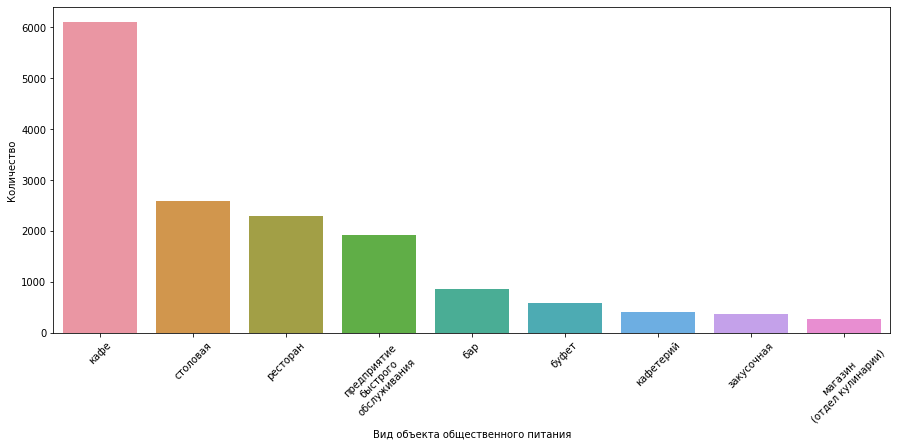

In [5]:
data.loc[data['object_type'] == 'предприятие быстрого обслуживания', 'object_type'] = 'предприятие\nбыстрого\nобслуживания'
data.loc[data['object_type'] == 'магазин (отдел кулинарии)', 'object_type'] = 'магазин\n(отдел кулинарии)'

#  группировка данных
data_type = (data.groupby('object_type', as_index=False)
             .agg(count=('id','count'))
             .sort_values(by='count', ascending=False))

#  построение графика
plt.style.use('seaborn-pastel')
plt.figure(figsize=(15, 6))
plt.xticks(rotation = 45)
sns.barplot(x='object_type', y='count', data=data_type)
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Количество')

***Вывод:***

По количеству очевидным лидером становится кафе - их более 6000. Далее идут столовая, ресторан и предприятие быстрого обслуживания.

2) Исследуем соотношение сетевых и несетевых заведений по количеству.

Text(0, 0.5, 'Количество')

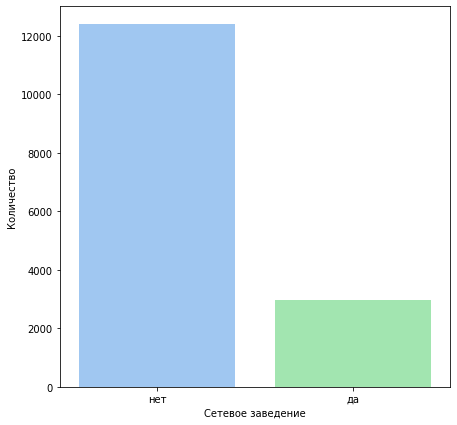

In [6]:
#  группировка данных
data_type = (data.groupby('chain', as_index=False)
             .agg(count=('id','count'))
             .sort_values(by='count', ascending=False))

#  построение графика
plt.figure(figsize=(7, 7))
sns.barplot(x='chain', y='count', data=data_type)
plt.xlabel('Сетевое заведение')
plt.ylabel('Количество')

***Вывод:***

Несетевых ресторанов в разы больше!

3) Посмотрим, для какого вида объекта общественного питания характерно сетевое распространение.

Text(0, 0.5, 'Количество')

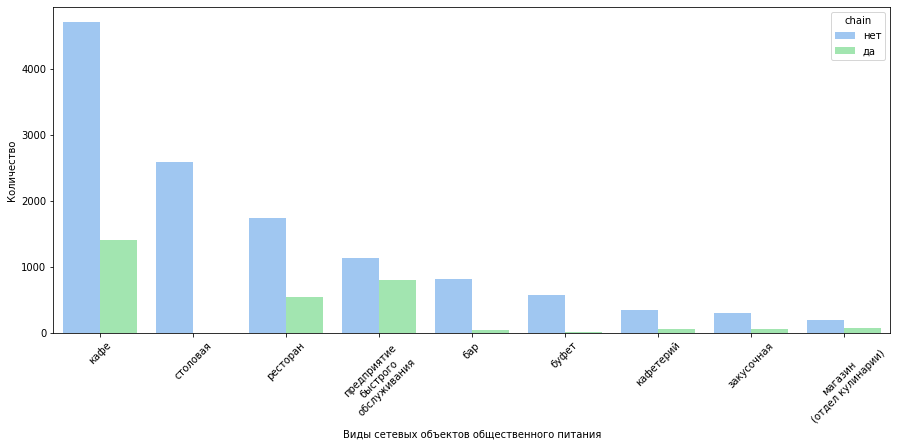

In [7]:
#  группировка данных
data_type = (data.groupby(['object_type', 'chain'], as_index=False)
             .agg(count=('id','count'))
             .sort_values(by='count', ascending=False))

#  построение графика
plt.figure(figsize=(15, 6))
plt.xticks(rotation = 45)
sns.barplot(x='object_type', y='count', data=data_type, hue='chain')
plt.xlabel('Виды сетевых объектов общественного питания')
plt.ylabel('Количество')

Для наглядности, посчитаем часть сетевых заведений от всех по типам:

Text(0, 0.5, 'Количество')

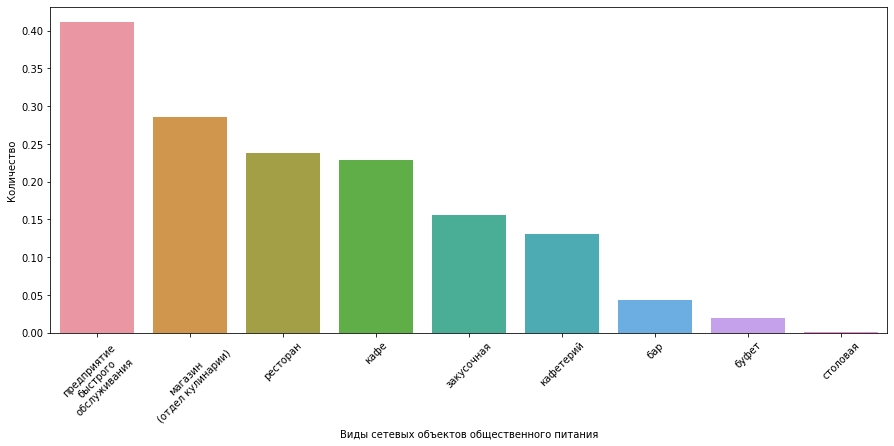

In [8]:
data_pivot = data.pivot_table(index='object_type', columns='chain', values='id', aggfunc='count')
data_pivot = data_pivot.reset_index()
data_pivot['part'] = data_pivot['да'] / (data_pivot['нет'] + data_pivot['да'])
data_pivot = data_pivot.sort_values(by='part', ascending=False)

#  построение графика
plt.figure(figsize=(15, 6))
plt.xticks(rotation = 45)
sns.barplot(x='object_type', y='part', data=data_pivot)
plt.xlabel('Виды сетевых объектов общественного питания')
plt.ylabel('Количество')

***Вывод:***

Сетевое распространение характерно для предприятий быстрого обслуживания, магазинов, ресторанов и кафе. И совсем не характерно для столовых, буфетов и баров.

4) Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [9]:
data_fr = data[data['chain'] == 'да']\
        .groupby('object_name')\
        .agg(total=('number','count'), seats=('number','mean'))[lambda x : x['total'] > 1]
data_fr.head()

,total,seats
object_name,,
bocconcino,3,66.666667
burger club,3,20.333333
coffeeshop company,4,47.250000
cofix,25,9.600000
correas,3,44.000000


Посмотрим на квантили количества заведений и количества мест:

In [10]:
print('Число заведений:', data_fr['total'].describe())
print()
print('Количество мест:', data_fr['seats'].describe())

Число заведений: count    246.000000
mean      10.719512
std       22.680536
min        2.000000
25%        2.000000
50%        4.000000
75%        7.000000
max      157.000000
Name: total, dtype: float64

Количество мест: count    246.000000
mean      59.390484
std       49.547694
min        0.000000
25%       21.125000
50%       44.000000
75%       85.000000
max      258.666667
Name: seats, dtype: float64


Разделим все сетевые заведения на 16 групп по квантилям:

In [11]:
#  функция для разбиения 
def groups(a, b, c, d):
    group_n = data_fr[data_fr['total'] > a]
    group_n = group_n[group_n['total'] <= b]
    group_n = group_n[group_n['seats'] > c]
    group_n = group_n[group_n['seats'] <= d]
    return group_n

In [12]:
#  выделение групп
#  группы с 2 заведениями:
group_1 = groups(1, 2, 0, 21)    #  и количеством мест до 21 (включая)
group_2 = groups(1, 2, 21, 44)     #  и количеством мест от 21 до 44 (включая)
group_3 = groups(1, 2, 44, 85)     #  и количеством мест от 44 до 85 (включая)
group_4 = groups(1, 2, 85, 258)    #  и количеством мест от 85 до 258 (включая)

#  группы с количеством заведений от 2 до 4 (включая):
group_5 = groups(2, 4, 0, 21)    #  и количеством мест до 21 (включая)
group_6 = groups(2, 4, 21, 44)     #  и количеством мест от 21 до 44 (включая)
group_7 = groups(2, 4, 44, 85)     #  и количеством мест от 44 до 85 (включая)
group_8 = groups(2, 4, 85, 258)    #  и количеством мест от 85 до 258 (включая)

#  группы с количеством заведений от 4 до 7 (включая):
group_9 = groups(4, 7, 0, 21)    #  и количеством мест до 21 (включая)
group_10 = groups(4, 7, 21, 44)     #  и количеством мест от 21 до 44 (включая)
group_11 = groups(4, 7, 44, 85)     #  и количеством мест от 44 до 85 (включая)
group_12 = groups(4, 7, 85, 258)    #  и количеством мест от 85 до 258 (включая)

#  группы с количеством заведений от 7 до 157 (включая):
group_13 = groups(7, 157, 0, 21)    #  и количеством мест до 21 (включая)
group_14 = groups(7, 157, 21, 44)     #  и количеством мест от 21 до 44 (включая)
group_15 = groups(7, 157, 44, 85)     #  и количеством мест от 44 до 85 (включая)
group_16 = groups(7, 157, 85, 258)    #  и количеством мест от 85 до 258 (включая)

In [13]:
d = {'name' : ['group_1', 'group_2', 'group_3', 'group_4', 'group_5', 'group_6', 
               'group_7', 'group_8', 'group_9', 'group_10', 'group_11', 'group_12', 
               'group_13', 'group_14', 'group_15', 'group_16'],
    'count':[group_1['total'].count(), group_2['total'].count(), group_3['total'].count(), 
             group_4['total'].count(), group_5['total'].count(), group_6['total'].count(), 
             group_7['total'].count(), group_8['total'].count(), group_9['total'].count(), 
             group_10['total'].count(), group_11['total'].count(), group_12['total'].count(), 
             group_13['total'].count(), group_14['total'].count(), group_15['total'].count(),
             group_16['total'].count()]}
groups = pd.DataFrame(data=d)
groups = groups.sort_values(by='count', ascending=False).reset_index(drop=True)
groups

,name,count
0,group_2,21
1,group_1,20
2,group_4,19
3,group_7,19
4,group_8,18
5,group_14,17
6,group_13,16
7,group_9,15
8,group_3,14
9,group_6,14


Text(0, 0.5, 'Количество заведений в группе')

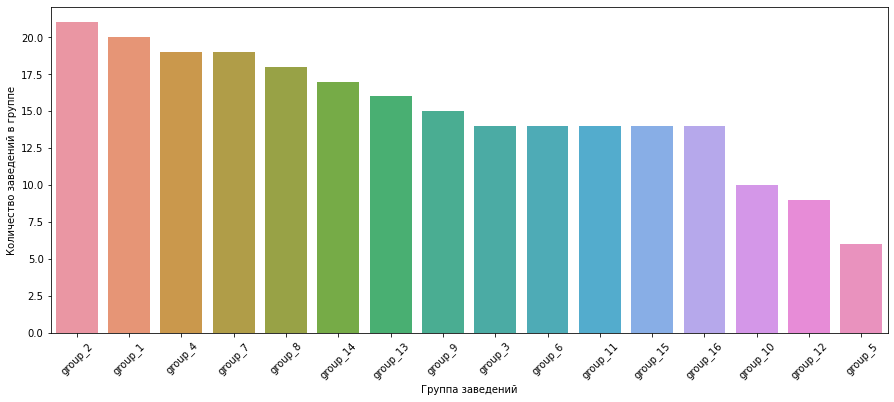

In [14]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation = 45)
sns.barplot(x='name', y='count', data=groups)
plt.xlabel('Группа заведений')
plt.ylabel('Количество заведений в группе')

***Вывод:***

Лидируют группы под номерами 2, 1, 4, 7, 8:

* группа 2 - мало заведений и среднее количество мест

* группа 1 - мало заведений и мало мест

* группа 4 - мало заведений и много мест

* группа 7 - среднее количество заведений с количеством мест выше среднего

* группа 8  - среднее количество заведений и много мест

Отсюда сделаем вывод, что все же, для сетевых заведений характерно небольшое количество заведений и достаточно много мест.

In [15]:
# Код ревьюера
(pd.qcut(data_fr['total'],q=3, labels = ['мало заведений', 'среднее число заведений', 'много заведений']).astype('str') + '/' + pd.qcut(data_fr['seats'],q=3, labels = ['мало мест', 'среднее число мест', 'много мест']).astype('str')).value_counts()

мало заведений/много мест                     43
мало заведений/мало мест                      43
мало заведений/среднее число мест             36
много заведений/среднее число мест            25
много заведений/мало мест                     24
среднее число заведений/среднее число мест    20
много заведений/много мест                    20
среднее число заведений/много мест            19
среднее число заведений/мало мест             16
dtype: int64

In [16]:
# код ревьюера

data[data['chain'] == 'да']\
        .groupby('object_name')\
        .agg(число_заведений=('number','count'), число_мест=('number','mean'))[lambda x : x['число_заведений'] > 1]

,число_заведений,число_мест
object_name,,
bocconcino,3,66.666667
burger club,3,20.333333
coffeeshop company,4,47.250000
cofix,25,9.600000
correas,3,44.000000
...,...,...
шоколадница,157,57.184713
штолле,13,30.076923
якитория,38,117.157895


5) Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? 

In [17]:
#  группируем данные
data_type = (data.groupby('object_type', as_index=False)
             .agg({'number': 'mean'})
             .sort_values(by='number', ascending=False))
data_type

,object_type,number
8,столовая,130.246618
7,ресторан,96.834136
1,буфет,51.129915
0,бар,43.494159
3,кафе,39.716019
6,предприятие\nбыстрого\nобслуживания,20.552262
4,кафетерий,9.123116
2,закусочная,7.608333
5,магазин\n(отдел кулинарии),5.589744


Text(0, 0.5, 'Среднее количество посадочных мест')

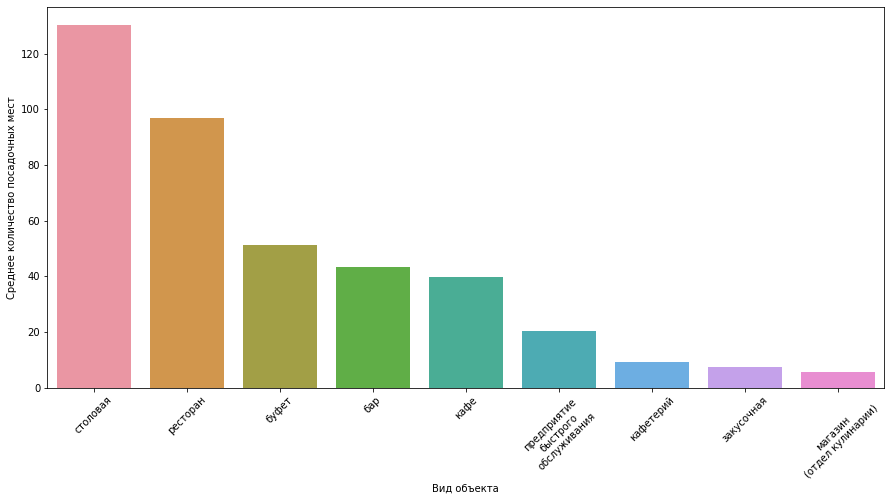

In [18]:
#  cтроим график
plt.figure(figsize=(15, 7))
plt.xticks(rotation = 45)
sns.barplot(x='object_type', y='number', data=data_type)
plt.xlabel('Вид объекта')
plt.ylabel('Среднее количество посадочных мест')

***Вывод:***

Самое большое среднее количество посадочных мест в столовых и ресторанах. Меньше всего, как ожидалось, в отделе кулинарии.

6) Выделим в отдельный столбец информацию об улице из столбца `address`.

In [19]:
data['address'] = data['address'].str.lower()
streets = data['address'].to_list()
streets_only = []
for street in streets:  
    start = street.find('город москва')
    end = street.find(' дом')
    streets_only.append(street[start+14:end-1])
data['street_name'] = streets_only

In [20]:
data.head()

,id,object_name,chain,object_type,address,number,street_name
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


7) Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

In [21]:
#  группируем данные
data_type = (data.groupby('street_name', as_index=False)
             .agg({'id': 'count'})
             .sort_values(by='id', ascending=False))
top_10 = data_type.head(10)
top_10

,street_name,id
1404,проспект мира,204
1408,профсоюзная улица,182
864,ленинградский проспект,170
1359,пресненская набережная,167
443,варшавское шоссе,155
868,ленинский проспект,147
1400,проспект вернадского,131
855,кутузовский проспект,114
769,каширское шоссе,103
782,кировоградская улица,102


Text(0, 0.5, 'Количество заведений')

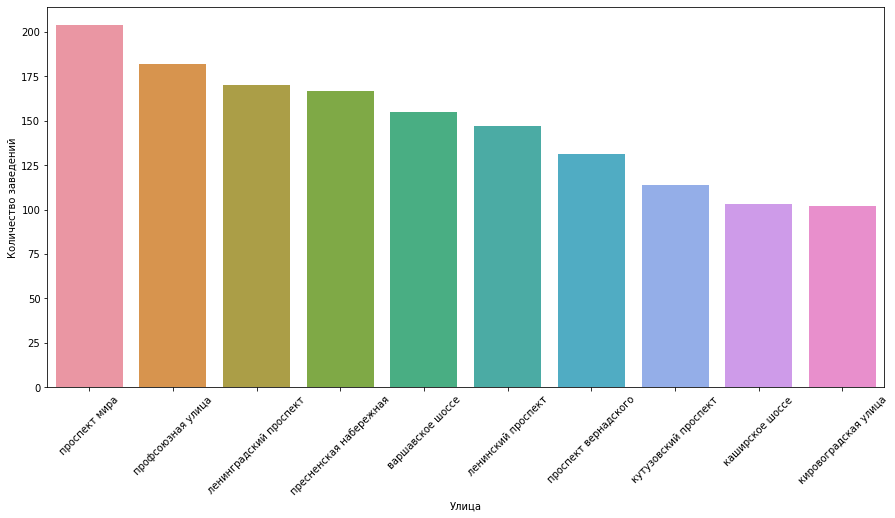

In [22]:
#  cтроим график
plt.figure(figsize=(15, 7))
plt.xticks(rotation = 45)
sns.barplot(x='street_name', y='id', data=top_10)
plt.xlabel('Улица')
plt.ylabel('Количество заведений')

***Вывод:***

В топ-10 попали улицы находящиеся как в центральных районах Москвы, так и ближе к окраинам:

* Проспект Мира: Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино
* Профсоюзная улица: Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево
* Ленинградский проспект: Беговой, Аэропорт, Сокол, Хорошёвский
* Пресненская набережная: Пресненский
* Варшавское шоссе: Донской, Нагатино-Садовники, Нагорный
* Ленинский проспект: Гагаринский и Донской
* Проспект Вернадского: Проспект Вернадского
* Кутузовский проспект: Дорогомилово, Фили-Давыдково
* Каширское шоссе: Нагатино-Садовники и Нагорный
* Ходынский бульвар: Хорошёвский

8) Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

In [23]:
data_type = data_type[data_type['id'] == 1]
data_type

,street_name,id
1649,"угрешская улица, владение 31, строение",1
2186,челюскинская улица,1
1892,"улица ленинская слобода, владение 26, строение",1
2107,улица фонвизина,1
1850,улица клочкова,1
...,...,...
1115,"ореховый бульвар, владение 3",1
1114,"ореховый бульвар, владение 26, корпус",1
1112,"ореховый бульвар, владение 1",1
1110,орехово-зуевский проезд,1


In [24]:
from io import BytesIO
import requests
spreadsheet_id = '13nJWXY_oZXKCqnbZ1H8DU8tGiqQaMnZaKdR14cOVy4o'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
dt = pd.read_csv(BytesIO(r.content))
dt.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [25]:
dt['streetname'] = dt['streetname'].str.lower()
dt = dt[['streetname', 'area']]
dt.columns = ['street_name', 'area']
dt.head()

,street_name,area
0,выставочный переулок,Пресненский район
1,улица гашека,Пресненский район
2,большая никитская улица,Пресненский район
3,глубокий переулок,Пресненский район
4,большой гнездниковский переулок,Пресненский район


In [26]:
data_type = data_type.merge(dt, on='street_name', how='left')
data_type = data_type[data_type['id'] == 1]
data_type

,street_name,id,area
0,"угрешская улица, владение 31, строение",1,NaN
1,челюскинская улица,1,Лосиноостровский район
2,"улица ленинская слобода, владение 26, строение",1,NaN
3,улица фонвизина,1,Бутырский район
4,улица клочкова,1,Район Фили-Давыдково
...,...,...,...
847,"ореховый бульвар, владение 3",1,NaN
848,"ореховый бульвар, владение 26, корпус",1,NaN
849,"ореховый бульвар, владение 1",1,NaN
850,орехово-зуевский проезд,1,Нижегородский район


In [27]:
data_type1 = (data_type.groupby('area', as_index=False)
             .agg({'id': 'count'})
             .sort_values(by='id', ascending=False))
data_type1 = data_type1.reset_index(drop=True)
data_type1 = data_type1.head(10)

Text(0, 0.5, 'Количество заведений')

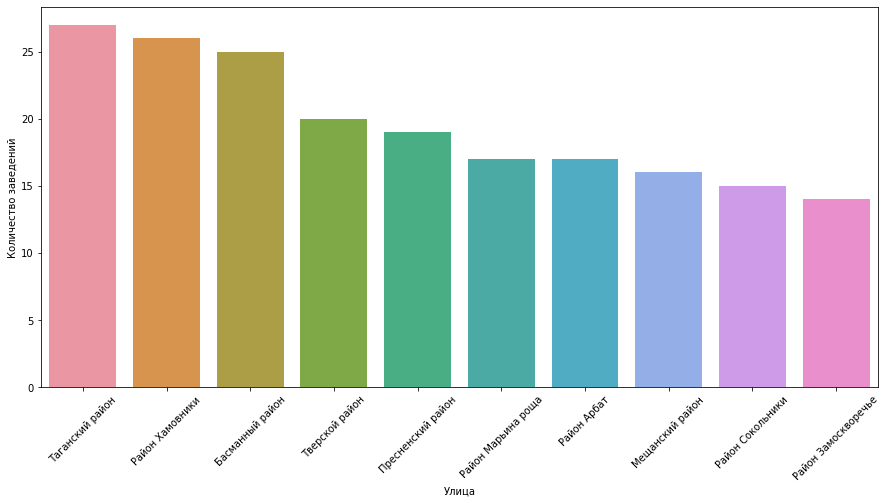

In [28]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation = 45)
sns.barplot(x='area', y='id', data=data_type1)
plt.xlabel('Улица')
plt.ylabel('Количество заведений')

***Вывод:***

Больше всего улиц с одним заведением в Таганском районе, районе Хамовники и Басманном районе.

# Шаг №3. Общий вывод <a id="step3"></a>

* В Москве больше всего кафе, столовые, рестораны и предприятия быстрого обслуживания в топе, остальных видов объектов общественного питания значительно меньше.

* По количеству преобладают несетевые заведения.

* Сетевое распространение характерно для предприятий быстрого обслуживания, магазинов, ресторанов и кафе. И совсем не характерно для столовых, буфетов и баров.

* Для сетевых заведений характерно много заведений с небольшим количеством мест.

* Самое большое среднее количество посадочных мест в столовых и ресторанах. Меньше всего, как ожидалось, в отделе кулинарии.

* Больше всего улиц с одним заведением в Таганском районе, районе Хамовники и Басманном районе.


***Рекомендации:***

1) Так как в Москве преобладают кафе, то скорее всего, они пользуются спросом, поэтому при выборе типа заведения рекомендую остановиться именно на нем. 

2) Количество мест стоило бы сделать средним - около 40. 

3) В качестве района, на мой взгляд, хорошо подойдут центральные районы - например, Таганский или Мещанский.

Презентация: <https://drive.google.com/file/d/1MS5wQlYYI0H7FhvDDJcqLcc7K8m8vSkL/view?usp=sharing>